## Processing Data

In [1]:
# import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
file = ('crypto_data.csv')
df = pd.read_csv(file)
df.set_index('Unnamed: 0', inplace=True)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000


In [3]:
# drop the cryptocurrencies that are not traded
df = df[df['IsTrading']!= False]
df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [4]:
# drop IsTrading variable 
del df['IsTrading']

In [5]:
# check if we do have any column with null value
df.isnull().sum()


CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
df.dropna(inplace =True)
df

<ipython-input-6-5b9c2482bc54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace =True)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [7]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [8]:
# filter by coin that be mined
df = df[df['TotalCoinsMined']> 0]
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [9]:
# drop unnecessary variable 
del df['CoinName']

In [10]:
# convert to numerical value
data_df= pd.get_dummies(df, columns=['Algorithm', 'ProofType'], drop_first=True)
data_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 The numbers of columns increase from 5 to 96. but the number of rows stay the same.

In [11]:
#  Standardize the dataset so that columns that contain larger values do not unduly influence the outcome.
scaled = StandardScaler().fit_transform(data_df)
scaled


array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [12]:
# Reducing the number of feauture and Preserving 90% of the explained variance in dimensionality reduction.

    # Initialize PCA model
pca = PCA(n_components = .9)

    # fit the model
data_pca = pca.fit_transform(scaled) 
df_pca = pd.DataFrame(data_pca)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,2.601561e-14,6.522550e-14,-0.013578,-1.329940,-0.053106,-0.333927,...,4.771880e-16,-3.658501e-15,-4.195183e-16,1.310193e-15,-1.959094e-15,1.556045e-15,2.226507e-15,5.911445e-16,-3.078212e-15,3.872931e-16
1,-0.319249,1.043547,-0.537804,0.001337,2.629941e-14,6.540291e-14,-0.014190,-1.332705,-0.057966,-0.330612,...,8.020778e-16,-3.375755e-15,1.088861e-16,1.133463e-15,-1.820442e-15,1.301803e-15,1.699764e-15,4.381857e-16,-3.092618e-15,5.001934e-16
2,2.304716,1.669996,-0.624077,0.004420,3.966537e-14,9.596858e-14,-0.062312,-1.554093,-0.945690,0.375087,...,6.821266e-15,2.501708e-14,-1.564621e-14,-6.775102e-15,-6.239732e-14,1.767195e-14,3.937774e-15,9.510967e-15,-8.014290e-15,-1.749375e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-9.302608e-15,-2.509897e-14,0.000326,0.283548,0.252906,-0.079820,...,-7.503107e-15,1.140211e-14,5.528911e-16,-1.190721e-14,-5.476968e-15,5.672859e-15,-6.422268e-16,1.869553e-15,-9.226112e-16,-6.705759e-15
4,-0.151951,-2.044976,0.364208,-0.001636,-2.157542e-14,-4.687778e-14,0.032350,0.524429,0.191031,0.074021,...,-2.028875e-13,1.068663e-13,3.192552e-14,-7.471559e-14,-8.782977e-14,-1.492744e-15,3.060897e-14,4.285098e-14,9.924138e-14,1.037389e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471052,0.822640,-0.090393,-0.007473,1.623465e-14,4.169177e-14,-0.848840,2.044413,3.558069,-2.407272,...,-1.164241e-14,1.206267e-14,1.302158e-15,-1.379057e-14,-8.037952e-15,6.758950e-15,2.792707e-15,5.182470e-15,1.006904e-15,-6.177339e-15
528,-0.333959,1.043287,-0.537434,0.001349,2.590580e-14,6.533584e-14,-0.013603,-1.330309,-0.053753,-0.333480,...,3.003909e-16,-3.831084e-15,-3.425086e-16,1.381412e-15,-1.880519e-15,1.069779e-15,2.117841e-15,4.512476e-16,-2.808531e-15,7.746646e-16
529,0.324179,-2.322781,0.387363,-0.001291,-1.875572e-14,-5.055885e-14,0.022272,0.167091,-0.044758,0.260887,...,-4.825336e-14,5.042748e-14,8.495162e-15,-5.332959e-14,-8.339704e-15,1.969373e-15,-1.614328e-14,2.936339e-14,8.464655e-15,1.449740e-14
530,-0.149546,-2.058994,0.379620,-0.001675,-2.043175e-14,-5.206172e-14,0.033758,0.550420,0.235951,0.074012,...,1.609061e-15,-3.259344e-15,6.264070e-16,7.471035e-16,-6.388774e-15,2.725207e-15,1.896376e-15,2.098108e-15,-3.208146e-15,6.818642e-17


The numbers of features decrease from 96 to 74. 

In [13]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02851314, 0.02183228, 0.02093007, 0.02087258, 0.02087257,
       0.02087257, 0.02085124, 0.01910435, 0.0179288 , 0.01777379,
       0.01662938, 0.01629408, 0.01583495, 0.01464966, 0.0134856 ,
       0.01262337, 0.01231377, 0.01127287, 0.01093674, 0.01070932,
       0.01062572, 0.01060732, 0.01059359, 0.0105697 , 0.01055562,
       0.01051051, 0.01049655, 0.01049558, 0.01049558, 0.01049558,
       0.01049381, 0.01048438, 0.01047714, 0.01047581, 0.01047329,
       0.01047115, 0.01046928, 0.01046411, 0.01046265, 0.01045618,
       0.01045597, 0.01045597, 0.01045525, 0.01045351, 0.01044982,
       0.01044805, 0.0104431 , 0.01043743, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628])

In [14]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results
from sklearn.manifold import TSNE

# TSNE MODEL
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(df_pca)

# Check that dimensions have been reduced to two
tsne_features.shape

C:\Users\carol\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

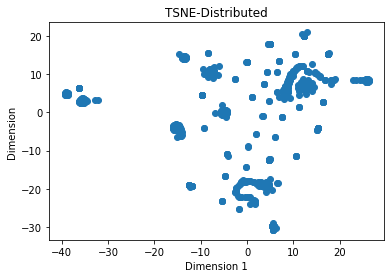

In [15]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.title("TSNE-Distributed")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension')
plt.show()

There is no distinct clusters.

In [16]:
# Results colored by target value
# df_pca['class'] = df['target']
# fig, ax = plt.subplots()

# groups = pd.DataFrame(tsne_features, columns=['x', 'y']).assign(category=y).groupby('category')
# for name, points in groups:
#     ax.scatter(points.x, points.y, label=name)

# ax.legend()

In [17]:
# KMeans with TSNE dataframe
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 10))
for i in k:
    knn = KMeans(n_clusters = i, random_state = 0)
    knn.fit(tsne_features )
    inertia.append(knn.inertia_)
    
elbow = {'k':k, 'inertia':inertia}
elbow_df = pd.DataFrame(elbow)
elbow_df   

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,212675.531250
1,2,123759.398438
2,3,56867.640625
3,4,32238.589844
4,5,26176.552734
5,6,21143.019531
6,7,18459.580078
7,8,14993.799805
8,9,12885.426758


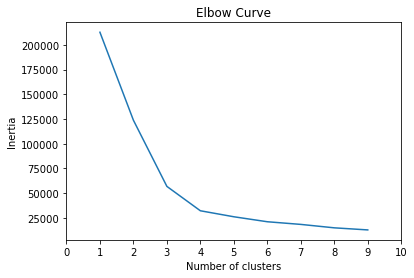

In [18]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
## KMeans with pcataframe
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 10))
for i in k:
    knn = KMeans(n_clusters = i, random_state = 0)
    knn.fit(df_pca)
    inertia.append(knn.inertia_)
    
elbowS = {'k':k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbowS)
df_elbow 

C:\Users\carol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46445.752170
1,2,45376.536552
2,3,44121.412291
3,4,43242.958279
4,5,42458.943854
5,6,41288.979747
6,7,40823.586399
7,8,39753.867554
8,9,38885.062036


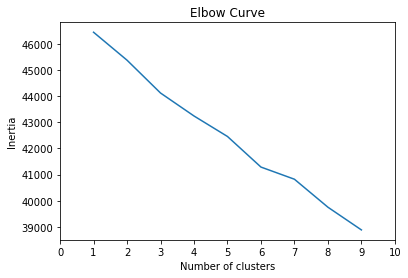

In [20]:
#identify the best number of clusters
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Conclusion
Without output label, we are unable to visualise how many clusters we should have. But based on TSNE Elbow Curve, 4 is number of clusters.